In [0]:
# =======================
# 📦 Importação de Bibliotecas
# =======================

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão de dados em treino e teste
from sklearn.model_selection import train_test_split

# Padronização de variáveis numéricas
from sklearn.preprocessing import StandardScaler

# Modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)

In [0]:
# =======================
# 📂 Leitura da Base de Dados
# =======================

# Leitura do arquivo CSV com os dados de diabetes
df = pd.read_csv('diabetes.csv')


In [0]:
# =======================
# 🔍 Análise Inicial da Base de Dados
# =======================

# Verifica os tipos de dados de cada coluna
print("Tipos de dados:")
print(df.dtypes)

# Verifica se há valores ausentes na base
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Exibe o número de linhas e colunas
print(f"\nDimensão do DataFrame: {df.shape[0]} linhas e {df.shape[1]} colunas")

# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

Tipos de dados:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Valores ausentes por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dimensão do DataFrame: 768 linhas e 9 colunas

Estatísticas descritivas:


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
3.8450520833333335,120.89453125,69.10546875,20.536458333333332,79.79947916666667,31.992578124999998,0.47187630208333325,33.240885416666664,0.3489583333333333
3.3695780626988694,31.97261819513622,19.355807170644777,15.952217567727637,115.24400235133817,7.884160320375446,0.3313285950127749,11.760231540678685,0.47695137724279896
0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
1.0,99.0,62.0,0.0,0.0,27.3,0.24375,24.0,0.0
3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0,0.0
6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0
17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


In [0]:
# =======================
# 🛠️ Tratamento de Valores Zerados (considerados ausentes)
# =======================

# 1. Colunas em que valores zero não fazem sentido clínico
cols_com_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. Criação de um DataFrame auxiliar contendo apenas essas colunas
df_tratado = df[cols_com_zeros]

# 3. Substituição dos valores 0 por NaN (indicando dados ausentes)
df_tratado = df_tratado.replace(0, np.nan)

# 4. Preenchimento dos valores ausentes com a mediana de cada coluna
df_tratado = df_tratado.fillna(df_tratado.median())

# 5. Substituição das colunas originais pelas versões tratadas
for col in cols_com_zeros:
    df[col] = df_tratado[col]

In [0]:
# =======================
# 🧠 Criação de Variáveis Categóricas (com base clínica ou distribucional)
# =======================

# 📌 Faixa Etária
def faixa_etaria(x):
    if x <= 30:
        return 'Age_Low'
    elif x < 40:
        return 'Age_Med'
    else: 
        return 'Age_Risk'
df['faixa_et'] = df['Age'].apply(faixa_etaria)
dumfaixa = pd.get_dummies(df['faixa_et'])
df = pd.concat([df, dumfaixa], axis=1)

# 📌 Pressão Arterial
def pressao(x):
    if x < 60:
        return 'BP_Low'
    elif x < 85:
        return 'BP_Nor'
    else: 
        return 'BP_High'
df['Pressao'] = df['BloodPressure'].apply(pressao)
dumpressao = pd.get_dummies(df['Pressao'])
df = pd.concat([df, dumpressao], axis=1)

# 📌 Hereditariedade (DiabetesPedigreeFunction)
def Hereditariedade(x):
    if x < 0.372500:
        return 'Her_Low'
    elif x < 0.63:
        return 'Her_Med'
    else: 
        return 'Her_Risk'
df['Hereditariedade'] = df['DiabetesPedigreeFunction'].apply(Hereditariedade)
dumher = pd.get_dummies(df['Hereditariedade'])
df = pd.concat([df, dumher], axis=1)

# 📌 Índice de Massa Corporal (IMC / BMI)
def BMI_Class(x):
    if x < 25:
        return 'BMI_Low'
    elif x < 30:
        return 'BMI_Med'
    else: 
        return 'BMI_Risk'
df['BMI_Class'] = df['BMI'].apply(BMI_Class)
dumbmi = pd.get_dummies(df['BMI_Class'])
df = pd.concat([df, dumbmi], axis=1)

# 📌 Insulina (Insulin)
def Ins(x):
    if x < 121.5:
        return 'Ins_Low'
    elif x <= 127.250:
        return 'Ins_Med'
    else: 
        return 'Res_Ins'  # resistência à insulina
df['Insu'] = df['Insulin'].apply(Ins)
dumins = pd.get_dummies(df['Insu'])
df = pd.concat([df, dumins], axis=1)

# 📌 Glicose (Glucose):
def Gluc(x):
    if x < 100:
        return 'Low_Gluc'
    elif x < 126:
        return 'Med_Gluc'
    else: 
        return 'High_Gluc'
df['Gluc'] = df['Glucose'].apply(Gluc)
dumgluc = pd.get_dummies(df['Gluc'])
df = pd.concat([df, dumgluc], axis=1)

In [0]:
# =======================
# 🧹 Seleção das Variáveis para o Modelo
# =======================

# Remoção de colunas que:
# - Já foram transformadas em variáveis dummies (para evitar duplicidade)

df_modelo = df.drop(columns=[
    'Age',                     # substituída por dummies de faixa_et
    'BMI',                     # substituída por BMI_Class
    'BloodPressure',           # substituída por Pressao
    'DiabetesPedigreeFunction',# substituída por Hereditariedade
    'SkinThickness',           # não será usada neste modelo
    'faixa_et',                # categorizada (usamos dummies)
    'Pressao',                 # categorizada
    'Hereditariedade',         # categorizada
    'BMI_Class',               # categorizada
    'Insu',                    # categorizada
    'Insulin',                 # substituída por Insu
    'Gluc',                    # categorizada
    'Low_Gluc',                #não necessária
    'Med_Gluc',                #não necessária
    'High_Gluc',               #não necessária
])


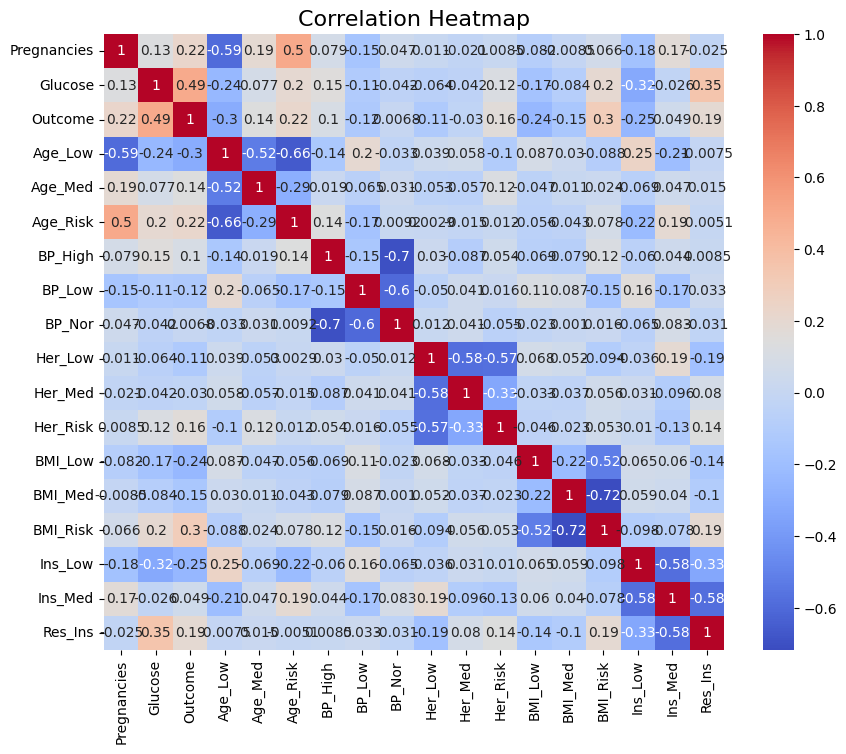

In [0]:
# =======================
# 🔥 Mapa de Calor das Correlações
# =======================

# Geração de um heatmap (mapa de calor) para visualizar as correlações entre as variáveis do dataframe preparado para o modelo.
# Isso ajuda a entender possíveis multicolinearidades ou relações importantes entre os atributos.

plt.figure(figsize=(10, 8))  # Define o tamanho do gráfico
sns.heatmap(df_modelo.corr(), annot=True, cmap='coolwarm')  # Cria o mapa com anotações e colormap
plt.title("Correlation Heatmap", fontsize=16)  # Título do gráfico
plt.show()  # Exibe o gráfico

In [0]:
# =======================
# 🔍 Treinamento com Regressão Logística
# =======================

# Separando as features (X) e a variável alvo (y)
X = df_modelo.drop(columns=['Outcome'])  # Removemos a coluna alvo do conjunto de atributos
y = df_modelo['Outcome']  # Coluna alvo: indica se a pessoa é diabética (1) ou não (0)

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Realizando previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo com métricas clássicas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Exibindo os resultados de desempenho
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Matriz de Confusão:")
print(matriz)


Acurácia: 0.77
Precisão: 0.69
Recall: 0.65
F1-score: 0.67
Matriz de Confusão:
[[83 16]
 [19 36]]


AUC - Regressão Logística: 0.82


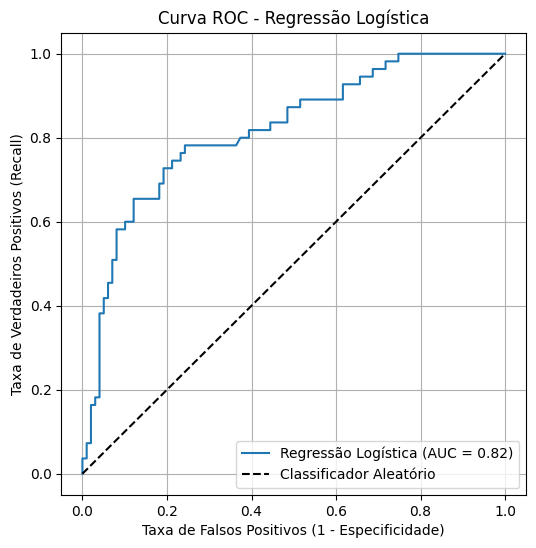

In [0]:
# ================================
# 📈 Curva ROC e AUC - Regressão Logística
# ================================

# Passo 1: Obter as probabilidades da classe positiva (Outcome = 1)
probs_lr = modelo.predict_proba(X_test)[:, 1]

# Passo 2: Calcular pontos da Curva ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

# Passo 3: Calcular AUC
auc_lr = roc_auc_score(y_test, probs_lr)
print(f"AUC - Regressão Logística: {auc_lr:.2f}")

# Passo 4: Plotar
plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.grid()
plt.show()


In [0]:
# =======================
# 🌲 Treinamento com Random Forest
# =======================

# Instanciando o modelo Random Forest com 100 árvores (n_estimators)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
acuracia = accuracy_score(y_test, y_pred_rf)
precisao = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
matriz = confusion_matrix(y_test, y_pred_rf)

# Exibindo os resultados
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Matriz de Confusão:")
print(matriz)


Acurácia: 0.79
Precisão: 0.70
Recall: 0.71
F1-score: 0.70
Matriz de Confusão:
[[82 17]
 [16 39]]


AUC: 0.82


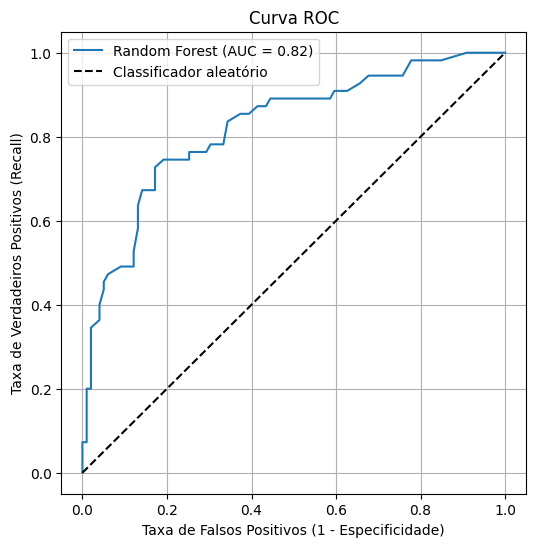

In [0]:
# ===========================
# 📈 Curva ROC e AUC - Random Forest
# ===========================

# Passo 1: Obter as probabilidades preditas para a classe positiva (diabetes = 1)
# predict_proba retorna duas colunas: [prob para classe 0, prob para classe 1]
probs = rf_model.predict_proba(X_test)[:, 1]

# Passo 2: Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Passo 3: Calcular a área sob a curva (AUC)
auc = roc_auc_score(y_test, probs)
print(f"AUC: {auc:.2f}")

# Passo 4: Plotar a curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador aleatório')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


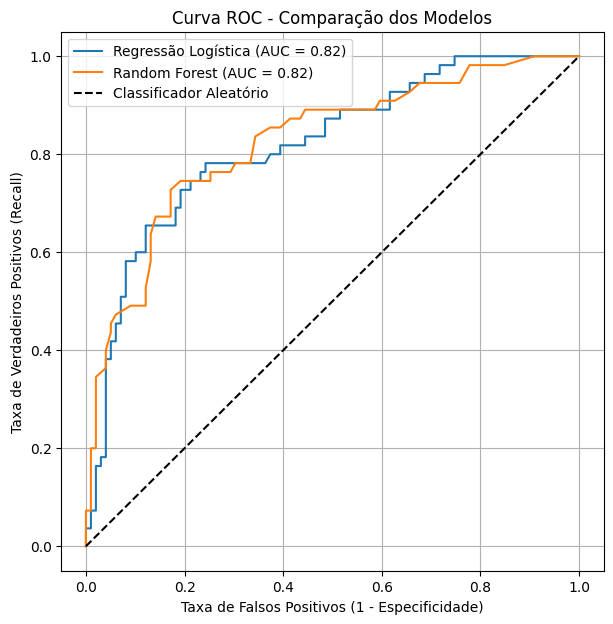

In [0]:
# ================================
# 📊 Comparando Curvas ROC: Regressão Logística vs Random Forest
# ================================

# Probabilidades da classe positiva
probs_lr = modelo.predict_proba(X_test)[:, 1]
probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)

# AUC
auc_lr = roc_auc_score(y_test, probs_lr)
auc_rf = roc_auc_score(y_test, probs_rf)

# Plotando as curvas
plt.figure(figsize=(7, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')

# Ajustes visuais
plt.title('Curva ROC - Comparação dos Modelos')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.legend()
plt.grid(True)
plt.show()


In [0]:
# Converter colunas para suporte a transferencia via spark
df = df.astype({col: 'int16' for col in df.select_dtypes('UInt8').columns})

# variavel com nome da tabela
table_name = "base_diabetes"

# Criação de base para o databricks
spark.createDataFrame(df).write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable('base_diabete')